<h2> ====================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 26: Neural Networks (Part 3)</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=====================================================</h2>


<h2>Lecture Outline</h2>

<ul>
    <li> Review of the Perceptron (1-Layer NN)</li>
    <li>Introduction of a 2-Layer NN</li>
    <li> Forward Propagation
    <ol>
        <li> Single Training Sample</li>
        <li> Vectorized Version</li>
        <li>Vectorized Version for Multiple Training Samples</li>
        </ol></li>
          
   </li>
    
 </ul>

<h2> Review: Perceptron (1-Layer NN)</h2>

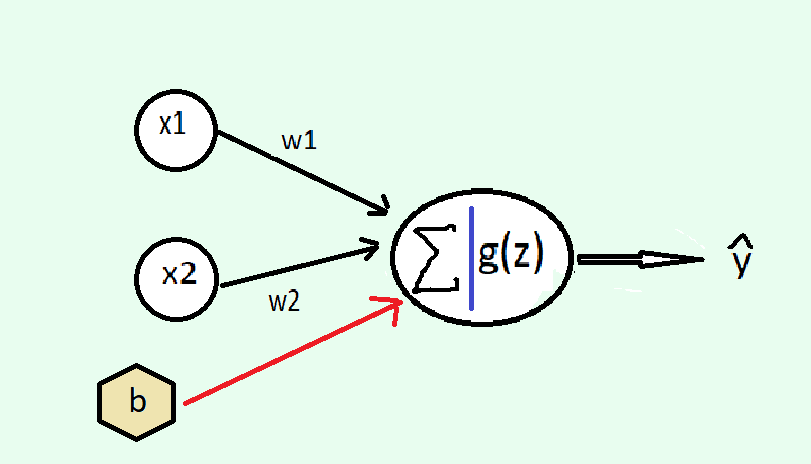
<br>


<font size='5'>
$$\fbox{$x\,\&\,w \, \&\, b$}\longrightarrow\fbox{$z=w^Tx+b$}\Rightarrow\fbox{$a=\sigma(z)$}\longrightarrow \fbox{$L(a,y)$}$$
</font>

<h2> A 2-Layer Neural Network</h2>

In what follows we will build the following simple 2-layer Neural Network. This means we have one input layer, one hidden layer, and one output layer. For simplicity of presentation, we will only have two neurons in the hidden layer. We will first focus on the theoretical aspects and then discuss the Python implementaion.

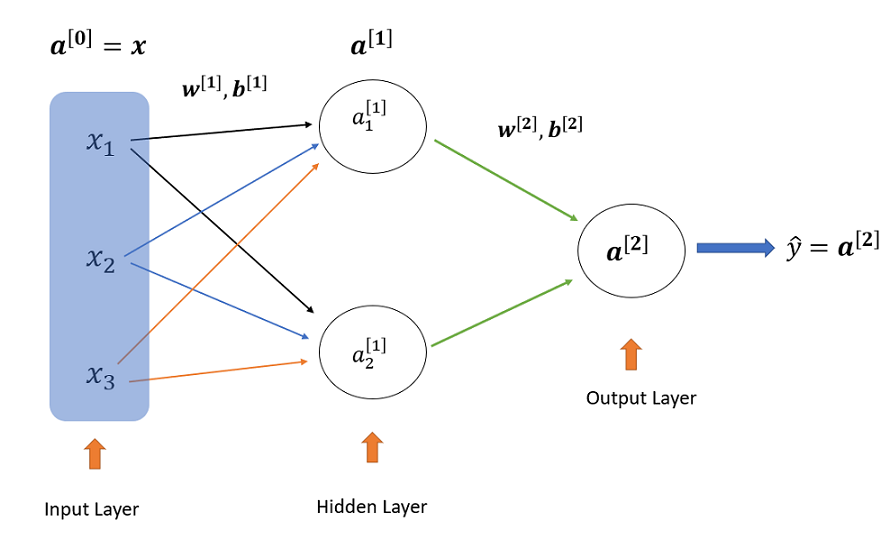

<h2>Forward Propagation</h2>

The underlying mechanism of the above 2-layer NN is very similar to that of a Perceptron, but repeated multiple times. In this case, one may think of the above 2-layer NN as a collection of three Perceptrons!

In what follows, we will show step-by-step how to compute the output of the NN, namely $\hat{y}=a^{[2]}$.

<b> Notation:</b> Superscripts in square brackets denote the number of the layer we are at, while the subscript the node we are at. For example $a^{[1]}_2$ means that we are in layer 1 and node 2. In general, $a^{[l]}_i$ denotes the computation at layer $l$ in node $i$.

Recall, that at each node there are two computations happening, a summation and an application of the activation function. Specifically:

<font size='3'>
Let $$a^{[0]}=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}$$

Then,

$$z_1^{[1]}=w^{[1]\,T}_1a^{[0]}+b_1^{[1]}\, \Rightarrow a_1^{[1]}=\sigma\left(z_1^{[1]}\right)$$

$$z_2^{[1]}=w^{[1]\,T}_2a^{[0]}+b_2^{[1]}\, \Rightarrow a_2^{[1]}=\sigma\left(z_2^{[1]}\right)$$


So $$a^{[1]}=\begin{bmatrix}a_1^{[1]}\\a_2^{[1]}\end{bmatrix}$$

is the output of the hidden layer.

So, the final output is $$z^{[2]}=w^{[2]\,T}a^{[1]}+b^{[2]}\, \Rightarrow a^{[2]}=\sigma\left(z^{[2]}\right)$$

</font>

<font size='3'>

<h3>Vectorized Version</h3>

Let $$
z^{[1]}=\begin{bmatrix} z_1^{[1]}\\z_2^{[1]}\end{bmatrix}_{2\times 1}\, ,\,
W^{[1]}=
\begin{bmatrix}
w_1^{[1]\, T}\\ w_2^{[1]\, T}
\end{bmatrix}_{2 \times 3} 
\, , \, 
b^{[1]}=\begin{bmatrix}b^{[1]}_1 \\ b^{[1]}_2\end{bmatrix}_{2 \times 1}
$$

So, the output of the hidden layer is computed as follows:

$$z^{[1]}=W^{[1]}a^{[0]}+b^{[1]} \, \text{ and } a^{[1]}=\sigma\left(z^{[1]}\right)$$


Since we have only one node in the output layer, the final ouptput computation is the same as above:

$$z^{[2]}=W^{[2]}a^{[1]}+b^{[2]}\, \Rightarrow a^{[2]}=\sigma\left(z^{[2]}\right)$$

We want to note that $W^{[2]}$ is a $1\times 2$ matrix and $b^{[2]}$ is a scalar.

To summarize, the output is computed as below:

\begin{eqnarray*}
z^{[1]}&=&W^{[1]}a^{[0]}+b^{[1]}\\
a^{[1]}&=&\sigma\left(z^{[1]}\right)\\
& &\\
z^{[2]}&=&W^{[2]}a^{[1]}+b^{[2]}\\ 
a^{[2]}&=&\sigma\left(z^{[2]}\right)
\end{eqnarray*}




<font color='red' size='5'>Exercise:</font> Take about 5 minutes to verify these computations.

</font>

<h2>Multiple Training Samples</h2>


<font size='3'>
    
Suppose now we have a training data of $m$ examples $$\{(x^{(1)},y^{(1)}),\dots,(x^{(m)},y^{(m)})\}$$

So, for each training example $x^{(i)}$ we need to compute the output of the neural network, namely, $\hat{y}^{(i)}=a^{[2](i)}$, $i=1,2,3,\dots,m.$ The superscript in round brackets $(i)$ corresponds to the training sample, wheras the superscript in the square brackets correspond to the particular layer of the NN.

So, to compute all the outputs we would need to iterate over all of the training samples. 

For $i$ from $1$ to $m$:

$\hspace{1cm} z^{[1](i)}=W^{[1]}a^{[0](i)}+b^{[1]}$

$\hspace{1cm}a^{[1](i)}=\sigma\left(z^{[1](i)}\right)$

$\hspace{1cm} z^{[2](i)}=W^{[2]}a^{[1](i)}+b^{[2]}$

$\hspace{1cm}a^{[2](i)}=\sigma\left(z^{[2](i)}\right)$



As we discussed last time, for-loops are computationally costly, so if possible we should avoid them. 

We can vectorize this process across all the $m$ trainings samples in a similar way as for the Perceptron, and in effect compute the outputs essentially at the same time for all the training samples.


Let 

$$A^{[0]}:=X=\begin{bmatrix}x^{(1)} & x^{(2)}&\dots &x^{(m)}\end{bmatrix}_{n_x\times m}$$ 

be an $n_x \times m$ matrix (in our case $n_x=3$) containing all of the $m$ training samples. Then, the forward propagation of the NN above can be computed as follows:

\begin{eqnarray*}
Z^{[1]}&=&W^{[1]}A^{[0]}+b^{[1]}\\
A^{[1]}&=&\sigma\left(Z^{[1]}\right)\\
& &\\
Z^{[2]}&=&W^{[2]}A^{[1]}+b^{[2]}\\
A^{[2]}&=&\sigma\left(Z^{[2]}\right)\\
\end{eqnarray*}

Where 

\begin{eqnarray*}
Z^{[1]}&=&\begin{bmatrix}z^{[1](1)}& z^{[1](2)} &\dots &z^{[1](m)}\end{bmatrix}_{2\times m}\\
A^{[1]}&=&\begin{bmatrix}a^{[1](1)} &a^{[1](2)} &\dots & a^{[1](m)}\end{bmatrix}_{2\times m}\\
& &\\
Z^{[2]}&=&\begin{bmatrix}z^{[2](1)}& z^{[2](2)} &\dots &z^{[2](m)}\end{bmatrix}_{1\times m}\\
A^{[2]}&=&\begin{bmatrix}a^{[2](1)} &a^{[2](2)} &\dots & a^{[2](m)}\end{bmatrix}_{1\times m}\\
\end{eqnarray*}

One way to make this notation more tangible is to think of it as follows: horizontally they iterate through different training examples wheras vertically they run through different nodes on each layer.


<font color='red' size='5'>Exercise:</font> Take about 5-10 minutes to verify these computations!

</font>